## Basic gates 

In [3]:
from qiskit import QuantumCircuit
from qiskit import *
from math import *

In [4]:
# Resgister one qubit
q = QuantumRegister(1)

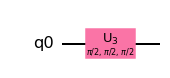

In [6]:
# Circuit drawing a u3(pi/2,pi/2,pi/2) gate

qc = QuantumCircuit(q)
qc.u3(pi/2,pi/2,pi/2,q)
qc.draw('mpl')

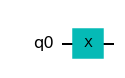

In [7]:
# Circuit drawing one X gate

qc = QuantumCircuit(q)
qc.x(0)
qc.draw('mpl')

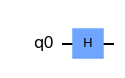

In [8]:
# Circuit drawing an H-gate

qc = QuantumCircuit(q)
qc.h(0)
qc.draw('mpl')

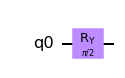

In [9]:
# Circuit drawing Ry(pi/2) gate

qc = QuantumCircuit(q)
qc.ry(pi/2,0)
qc.draw('mpl')

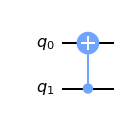

In [10]:
# Control NOT gate with control in qubit 1 and target in 0.

qc = QuantumCircuit(2)
qc.cx(1,0)
qc.draw('mpl')

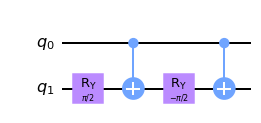

In [11]:
# Controlled Ry-gate

qc = QuantumCircuit(2)

qc.ry(pi/2,1)
qc.cx(0,1)
qc.ry(-pi/2,1)
qc.cx(0,1)



qc.draw('mpl')

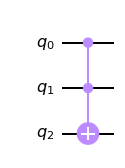

In [12]:
# Toffoli gate

qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw('mpl')

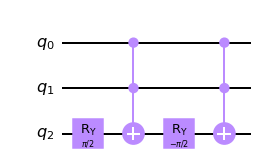

In [13]:
# Double-controlled Ry-gate

qc = QuantumCircuit(3)

qc.ry(pi/2,2)
qc.ccx(0,1,2)
qc.ry(-pi/2,2)
qc.ccx(0,1,2)



qc.draw('mpl')

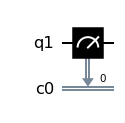

In [14]:

# Measurement gate 

q= QuantumRegister(1)
c= ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.measure(q,c)
qc.draw('mpl')

## Circuit one

This circuit will solve a simple homogeneous linear differential equation.

In [15]:
# Importing libraries

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np

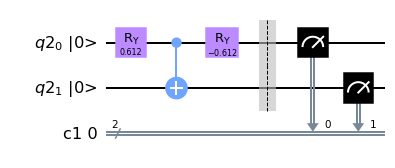

In [16]:
t=0.1  # time used to evaluate the ode

#Taylor series exapnsion
c0=np.cosh(t)
c1=np.sinh(t)

#Theta to rotate the qubits for superposition
theta=np.arctan2(np.sqrt(c1),np.sqrt(c0))

#Quantum registers and circuit
q= QuantumRegister(2)
c= ClassicalRegister(2)
qc = QuantumCircuit(q,c)

#Encoding gates
qc.ry(2*theta,q[0])
qc.cx(q[0],q[1])
qc.ry(-2*theta,q[0])

qc.barrier(q[0],q[1])

#Measure
qc.measure(q,c)
qc.draw('mpl',initial_state=True)

## Running circuit one on the Qasm Simulator

In [17]:
from qiskit import BasicAer, execute
from qiskit.visualization import plot_histogram

In [18]:
# Simulator

backend_sim = BasicAer.get_backend('qasm_simulator')

In [19]:
nshots=8192 # Number of simulations run.

#Qasm simulation
result = execute(qc, backend_sim, shots=nshots).result()
counts = result.get_counts(qc)

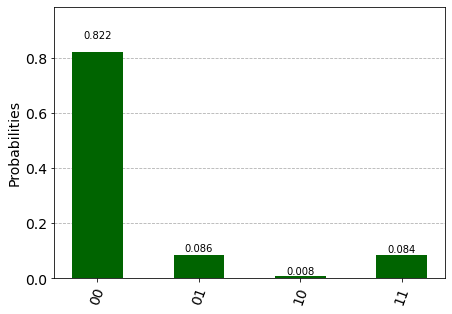

In [20]:
#Results obtained after simulations 
#in all states of the ancilla qubit.

plot_histogram(counts, color="darkgreen")

In [21]:
counts

{'11': 688, '00': 6733, '01': 707, '10': 64}

# Success probability

Success probabilities are probabilities calculated only when the ancilla is in state 0. 

##### Experimental value for the success probability:

In [24]:

# Conditional probabibilties in state |0>
p0 =counts.get('00')/nshots
p1 = counts.get('10')/nshots

# Experimental Success probability
S_p_exp = p0+p1
S_p_exp

0.8297119140625

##### Theoretical value for the success probability:

In [25]:
# Theoretical Success probability

# This was calculated in the thesis
S_p =(c0**2+c1**2)/(c0**2+c1**2+2*c0*c1)
S_p

0.8351600230178197

##### The experimental and theoretical results for the success probability are similar

## Solution of the differential equation

In [26]:
# Experimental Solution of the ODE

Y_exp = np.sqrt(p0/p1)
Y_exp

10.256857462205469

In [27]:
# Theoretical solution of the ODE

Y=c0/c1
Y

10.033311132253989

The experimetal and theoretical results for the solution of the differential equation are comparable

# Running circuit one on a Real device

In [39]:
# Load account

from qiskit import IBMQ
IBMQ.load_account()
provider=IBMQ.get_provider()

ibmqfactory.load_account:WARNING:2021-07-29 15:56:03,280: Credentials are already in use. The existing account in the session will be replaced.


In [40]:
# Getting available Backened

provider.backends(simulator=False, operational=True)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [41]:
# Selecting the backend we want to work with

backened=provider.get_backend('ibmq_santiago',simulator=False,operational=True)
backened.name()


'ibmq_santiago'

In [42]:
# simulating on the real device

nshots=8192

job_real = execute(qc, shots=nshots, backend= backened)
jobid = job_real.job_id()

In [43]:
# Checking the queque to register for using it

job_real.status()

job_real.queue_position()

12

In [44]:
# Getting results from the real device
retrieved_job = backened.retrieve_job(jobid)
result_real= retrieved_job.result()

counts_real= result_real.get_counts(qc)

In [45]:
counts_real

{'00': 6804, '01': 718, '10': 166, '11': 504}

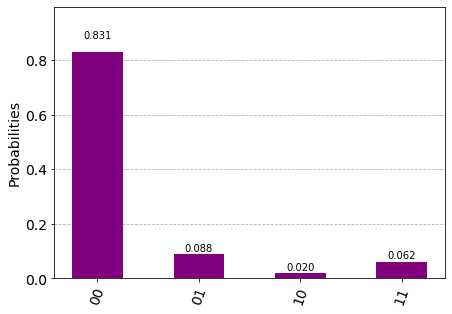

In [46]:
# Plotting results

plot_histogram(counts_real, color='purple')

### Success probability

In [47]:

# Probabilities in state |0>
p0 = counts_real.get('00')/nshots
p1 = counts_real.get('10')/nshots

# Success probability
S_p_Real =p0 + p1
S_p_Real

0.850830078125

### Solution to the ODE

In [48]:
# Real device solution

Y_real = np.sqrt(p0/p1)
Y_real

6.40218336251227

## Running circuit one on the Statevector Simulator

In [36]:
from qiskit.quantum_info import Statevector

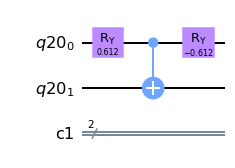

In [37]:
## Same code as above just removed the measure operators.

t=0.1
c0=np.cosh(t)
c1=np.sinh(t)
theta=np.arctan2(np.sqrt(c1),np.sqrt(c0))
q= QuantumRegister(2)
qc = QuantumCircuit(q,c)
qc.ry(2*theta,q[0])
qc.cx(q[0],q[1])
qc.ry(-2*theta,q[0])
qc.draw('mpl')

Initial state:

In [38]:
sv = Statevector.from_label('00')

We evolve the initial state with our circuit:

In [39]:
msv=sv.evolve(qc)

In [40]:
# State of the vector

msv.data

array([ 0.90936538+0.j, -0.28708882+0.j,  0.09063462+0.j,  0.28708882+0.j])

In [41]:
# Converting the vector to real numbers from complex numbers
result=msv.data.real

In [42]:
print(result)

[ 0.90936538 -0.28708882  0.09063462  0.28708882]


Operator for projecting the ancilla qubit to the state |0>:

In [43]:
# Projection operators

idmat=[[1,0],[0,1]] # Identity
proj=[[1,0],[0,0]]  #pi_0 projection operator

print(np.kron(idmat,proj)) # Tensor product of Identity and projection operator

[[1 0 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]]


#### Experimental result for the statevector with the ancilla qubit projected to |0>:

In [44]:
# Matrix multiplication of the vector and results of the tensor product

proj_result=np.dot(np.kron(idmat,proj),result)

In [45]:
# Experimental state vector
print(proj_result)

[0.90936538 0.         0.09063462 0.        ]


#### Theoretical result for the statevector with the ancilla qubit projected to |0>:

In [46]:
Theoretical=[c0/(c0+c1),0,c1/(c0+c1),0]

In [47]:
# Theoretical state vector

print(Theoretical)

[0.909365376538991, 0, 0.09063462346100909, 0]


#### The experimental and theoretical results exactly match :)

# Circuit two

This circuit will solve a homogeneous linear differential equation similar to circuit one. However,
we consider a more complicated matrix A, whose square is not I.

In [48]:
# Importing libraries

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np

The first step will be to find the operator $V$.

\begin{align}
V=(u^\dagger \otimes v)C_{10}^X(w \otimes I) \label{V10}
\end{align}



### First unitary

#### The general 2 qubit

$|\underline{\psi}\big>=\alpha_{00}|00\big>+\alpha_0|{01}\big>+\alpha_{10}|10\big>+\alpha_{11}|11\big>$

$|\underline{\psi}\big>=|0\big>\otimes\alpha_{00}|0\big>+|0\big>\otimes\alpha_{01}|1\big>+|1\big>\otimes\alpha_{00}|0\big>+|1\big>\otimes\alpha_{01}|1\big>$

$|\underline{\psi}\big>=|0\big>\otimes\Big(\alpha_{00}|0\big>+\alpha_{01}|1\big>\Big)+|1\big>\otimes\Big(\alpha_{10}|0\big>+\alpha_{11}|1\big>\Big)$

$|\underline{\psi}\big>=|0\big>\otimes|\psi\big>+|1\big>\otimes|
\phi\big>$


$|\psi\big>=\alpha_{00}|0\big>+\alpha_{01}|1\big>=\frac{\sqrt{c_0}}{\sqrt{c_0+c_1+c_2+c_3}}|0\big>+\frac{\sqrt{c_1}}{\sqrt{c_0+c_1+c_2+c_3}}|1\big>$

$|\psi\big>=\alpha_{10}|0\big>+\alpha_{11}|1\big>=\frac{\sqrt{c_2}}{\sqrt{c_0+c_1+c_2+c_3}}|0\big>+\frac{\sqrt{c_3}}{\sqrt{c_0+c_1+c_2+c_3}}|1\big>$



$\alpha_{00}=\frac{\sqrt{c_0}}{\sqrt{c_0+c_1+c_2+c_3}}$

$\alpha_{01}=\frac{\sqrt{c_1}}{\sqrt{c_0+c_1+c_2+c_3}}$

$\alpha_{10}=\frac{\sqrt{c_2}}{\sqrt{c_0+c_1+c_2+c_3}}$

$\alpha_{11}=\frac{\sqrt{c_3}}{\sqrt{c_0+c_1+c_2+c_3}}$

### The inner product and quadratic equation

We would like to choose the complex numbers a and b to make $|\psi'〉$ and $|\phi'〉$ orthogonal. The inner product $\big<\phi'|\psi'\big>$ is

$\big<\phi'|\psi'\big>=\frac{a^2}{b^{*2}}\big<\phi|\psi\big>+\frac{a}{b^{*}}\Big(\big<\psi|\psi\big>-\big<\phi|\phi\big>\Big)-\big<\psi|\phi\big>$

If$\big<\phi|\psi\big>\neq 0$, then setting $\big<\phi'|\psi'\big>$ to 0 gives a quadratic equation for $\frac{a}{b^∗}$, which has two complex solutions

$0=\frac{a^2}{b^{*2}}\big<\phi|\psi\big>+\frac{a}{b^{*}}\Big(\big<\psi|\psi\big>-\big<\phi|\phi\big>\Big)-\big<\psi|\phi\big>$

where


$\big<\phi|\psi\big>=\Big(\big<0|\alpha_{10}^*+\big<1|\alpha_{11}^*\Big)\cdot
\Big(\alpha_{00}|0\big>+\alpha_{01}|1\big>\Big)$

$=\alpha_{10}^{*}\alpha_{00}\big<0|0\big>+\alpha_{10}^*\alpha_{01}\big<0|1\big>+\alpha_{11}^*\alpha_{00}\big<1|0\big>+\alpha_{11}^*\alpha_{01}\big<1|1\big>$

$=\alpha_{10}^{*}\alpha_{00}+0+0+\alpha_{11}^*\alpha_{01}$

$=\alpha_{10}^{*}\alpha_{00}+\alpha_{11}^*\alpha_{01}$



$\big<\psi|\phi\big>=\Big(\big<0|\alpha_{00}^*+\big<1|\alpha_{01}^*\Big)\cdot
\Big(\alpha_{10}|0\big>+\alpha_{11}|1\big>\Big)$

$=\alpha_{00}^{*}\alpha_{10}\big<0|0\big>+\alpha_{00}^*\alpha_{11}\big<0|1\big>+\alpha_{01}^*\alpha_{10}\big<1|0\big>+\alpha_{01}^*\alpha_{11}\big<1|1\big>$

$=\alpha_{00}^{*}\alpha_{10}+0+0+\alpha_{01}^*\alpha_{11}$

$=\alpha_{00}^{*}\alpha_{10}+\alpha_{01}^*\alpha_{11}$




$\big<\psi|\psi\big>=\Big(\big<0|\alpha_{00}^*+\big<1|\alpha_{01}^*\Big)\cdot
\Big(\alpha_{00}|0\big>+\alpha_{01}|1\big>\Big)$

$=\alpha_{00}^{*}\alpha_{00}\big<0|0\big>+\alpha_{00}^*\alpha_{01}\big<0|1\big>+\alpha_{01}^*\alpha_{00}\big<1|0\big>+\alpha_{01}^*\alpha_{01}\big<1|1\big>$

$=\alpha_{00}^{*}\alpha_{00}+0+0+\alpha_{01}^*\alpha_{01}$

$=\alpha_{00}^{*}\alpha_{00}+\alpha_{01}^*\alpha_{01}$


$=\alpha_{00}^2+\alpha_{01}^2$




$\big<\phi|\phi\big>=\Big(\big<0|\alpha_{10}^*+\big<1|\alpha_{11}^*\Big)\cdot
\Big(\alpha_{10}|0\big>+\alpha_{11}|1\big>\Big)$

$=\alpha_{10}^{*}\alpha_{10}\big<0|0\big>+\alpha_{10}^*\alpha_{11}\big<0|1\big>+\alpha_{11}^*\alpha_{10}\big<1|0\big>+\alpha_{11}^*\alpha_{11}\big<1|1\big>$

$=\alpha_{10}^{*}\alpha_{10}+0+0+\alpha_{11}^*\alpha_{11}$

$=\alpha_{10}^{*}\alpha_{10}+\alpha_{11}^*\alpha_{11}$


$=\alpha_{10}^2+\alpha_{11}^2$




In [49]:
t=1/5 #Time


# Taylor expansion, with k=3
c0=1
c1= t
c2= t**2/2
c3= t**3/6

In [50]:
# Complex numbers

alpha_00=np.sqrt(c0)/np.sqrt(c0+c1+c2+c3)
alpha_01=np.sqrt(c1)/np.sqrt(c0+c1+c2+c3)
alpha_10=np.sqrt(c2)/np.sqrt(c0+c1+c2+c3)
alpha_11=np.sqrt(c3)/np.sqrt(c0+c1+c2+c3)


Let  $A=\big<\phi|\psi\big>$

#### $\big<\phi|\psi\big>=\alpha_{10}^{*}\alpha_{00}+\alpha_{11}^*\alpha_{01}$

In [51]:
A=alpha_10*alpha_00+alpha_11*alpha_01
A

0.12916317237106772

Let $B=\big<\psi|\phi\big>$

#### $\big<\psi|\phi\big>=\alpha_{00}^{*}\alpha_{10}+\alpha_{01}^*\alpha_{11}$


In [52]:
B=alpha_00*alpha_10+alpha_01*alpha_11
B  

0.12916317237106772

Let $C=\big<\psi|\psi\big>$

####  $\big<\psi|\psi\big>=\alpha_{00}^2+\alpha_{01}^2$

In [53]:
C=alpha_00**2+alpha_01**2
C

0.982532751091703

Let $D=\big<\phi|\phi\big>$

#### $\big<\phi|\phi\big>=\alpha_{10}^2+\alpha_{11}^2$


In [54]:
D=alpha_10**2+alpha_11**2
D

0.01746724890829695

The quadratic equation becomes


$0=\frac{a^2}{b^{*2}}\big<\phi|\psi\big>+\frac{a}{b^{*}}\Big(\big<\psi|\psi\big>-\big<\phi|\phi\big>\Big)-\big<\psi|\phi\big>$

$0=\frac{a^2}{b^{*2}}A+\frac{a}{b^{*}}(C-D)-B$

Let E=C-D and $Z=\frac{a}{b^{*}}$

$0=Z^2A+ZE-B$

$Z=\frac{-E\pm\sqrt{E^2+4AB}}{2A}$



In [55]:
E=C-D

In [56]:
# Quadratic solution 1

Z1=(-E+np.sqrt(E**2+4*A*B))/(2*A)
Z1

0.13152355962004403

In [57]:
# Quadratic solution 2

Z2=(-E-np.sqrt(E**2+4*A*B))/(2*A)
Z2

-7.603200543605137

$Z=\frac{a}{b^{*}}$

$b^*=\frac{a}{Z}$

$|a|^2+|b|^2=1$

$|a|^2+|\frac{a}{Z}|^2=1$

$|a|^2|Z|^2+|a|^2=|Z^2|$

$|a|^2(|Z|^2+1)=|Z^2|$

$|a|^2=\frac{|Z^2|}{|Z|^2+1}$

$|a|=\sqrt{\frac{|Z^2|}{|Z|^2+1}}$

In [58]:
#First value of a

a1=np.sqrt((Z1**2)/(Z1**2+1))
a1

0.13040053212483543

In [63]:
#Second value of a

a2=np.sqrt((-Z2)**2/((-Z2)**2+1))
a2

0.9914613967379465

In [64]:
#values of b

b1=a1/Z1
b2=a2/Z2
print(b1)
print(b2)

0.9914613967379465
-0.13040053212483524


We have a and b. Either pair can find the unitary matrix U. In this problem we choose a1 and b1.




$U=\begin{pmatrix}a&-b^*\\b&a^*\end{pmatrix}$

In [65]:
# First unitary u

U=[[a1,-b1],[b1,a1]]
U

[[0.13040053212483543, -0.9914613967379465],
 [0.9914613967379465, 0.13040053212483543]]

## Second unitary

We can pick positive real numbers $\lambda$ and $\mu$ so that $|\psi''\big>= |\psi'\big>/\lambda$ and
$|\phi''\big>= |\phi'\big>/\mu$ are unit vectors, making $|\psi''\big>$ and $|\phi''\big>$ an orthonormal
pair. They are therefore related to $|0\big>$ and $|1\big>$ by a unitary transformation v :

$|\psi''\big>=V|0\big>$ and $|\phi''\big>=V|1\big>$

\begin{align*}
V|0\big>&=|\psi''\big>\\\\
&=\frac{|\psi'\big>}{\lambda}\\\\
&=\frac{1}{\lambda}\Big(a|\psi \big> -b^*|\phi\big>\Big)\\\\
&=\frac{1}{\lambda}\Big[a\big(\alpha_{00}|0\big>+\alpha_{01}|1\big>\big)-b^*\big(\alpha_{10}|0\big>+\alpha_{11}|1\big>\big)\Big]\\\\
&=\frac{1}{\lambda}\Big[a\alpha_{00}|0\big>+a\alpha_{01}|1\big>\big)-b^*\alpha_{10}|0\big>-b^*\alpha_{11}|1\big>\Big]\\\\
&=\frac{1}{\lambda}\Big[\big(a\alpha_{00}-b^*\alpha_{10}\big)|0\big>+\big(a\alpha_{01}-b^*\alpha_{11}\big)|1\big>\Big]\\\\
=&\frac{1}{\lambda}\begin{pmatrix}a\alpha_{00}-b^*\alpha_{10}\\a\alpha_{01}-b^*\alpha_{11}\end{pmatrix}
\end{align*}

\begin{align*}
V|1\big>&=|\phi''\big>\\\\
&=\frac{|\phi'\big>}{\mu}\\\\
&=\frac{1}{\mu}\Big(b|\psi \big> +a^*|\phi\big>\Big)\\\\
&=\frac{1}{\mu}\Big[b\big(\alpha_{00}|0\big>+\alpha_{01}|1\big>\big)+a^*\big(\alpha_{10}|0\big>+\alpha_{11}|1\big>\big)\Big]\\\\
&=\frac{1}{\mu}\Big[b\alpha_{00}|0\big>+b\alpha_{01}|1\big>\big)+a^*\alpha_{10}|0\big>+a^*\alpha_{11}|1\big>\Big]\\\\
&=\frac{1}{\mu}\Big[\big(b\alpha_{00}+a^*~\alpha_{10}\big)|0\big>+\big(b\alpha_{01}+a^*\alpha_{11}\big)|1\big>\Big]\\\\
=&\frac{1}{\mu}\begin{pmatrix}b~\alpha_{00}+a^*~\alpha_{10}\\b~\alpha_{01}+a^*~\alpha_{11}\end{pmatrix}
\end{align*}

### For easy check

Let $X=a~\alpha_{00}-b^*~\alpha_{10}$ and $Y=a~\alpha_{01}-b^*~\alpha_{11}$

$V|0\big>=\frac{1}{\lambda}\begin{pmatrix}a~\alpha_{00}-b^*~\alpha_{10}\\a~\alpha_{01}-b^*~\alpha_{11}\end{pmatrix}=\frac{1}{\lambda}\begin{pmatrix}X\\Y\end{pmatrix}$

Let $Z=b~\alpha_{00}+a^*~\alpha_{10}$ and $K=b~\alpha_{01}+a^*~\alpha_{11}$

$V|1\big>=\frac{1}{\mu}\begin{pmatrix}b~\alpha_{00}+a^*~\alpha_{10}\\a~\alpha_{01}-b^*~\alpha_{11}\end{pmatrix}=\frac{1}{\mu}\begin{pmatrix}Z\\K\end{pmatrix}$

In [66]:
# Elements of |\psi_prime>

X= a1*alpha_00-b1*alpha_10
Y= a1*alpha_01-b1*alpha_11

# Elements of |\phi_prime>
Z= b1*alpha_00+a1*alpha_10
K= b1*alpha_01+a1*alpha_11
print('X=',X)
print('Y=',Y)
print('Z=',Z)
print('K=',K)

X= -0.00887967825144298
Y= 0.020009998010686418
Z= 0.9138238286136439
K= 0.405520358985421


A unit vector is a vector of unit length. Any non zero vector can be normalised into a unit vector by its norm. The unit vector must have a magnitude of 1. To convert to a vector to its unit vector find the norm and divide the vector components by the norm.

In our case the $\lambda$ and $\mu$ are the norms that transforms our vectors into a unit vector.

In [67]:
# Norm of Vector |\phi_prime>

lambda_norm=np.sqrt(X**2+Y**2)
lambda_norm

0.021891749729905645

In [68]:
# Norm of Vector v|1> 

mu_norm=np.sqrt(Z**2+K**2)
mu_norm

0.9997603469300845

We can define new values of X,Y,Z and K which we will devide by the calculated values of $\lambda$ and $\mu$.

In [69]:
# Elements of |\psi_double_prime>

X1= X/lambda_norm
Y1= Y/lambda_norm

# Elements of |\phi_double_prime>

Z1= Z/mu_norm
K1= K/mu_norm
print('X1=',X1)
print('Y1=',Y1)
print('Z1=',Z1)                                                                                                           
print('K1=',K1)

X1= -0.4056175664804319
Y1= 0.9140428817963041
Z1= 0.9140428817963008
K1= 0.4056175664804397



$V|0\big>=\begin{pmatrix}X1\\Y1\end{pmatrix}$


$V|1\big>=\begin{pmatrix}Z1\\K1\end{pmatrix}$

## Finding V

$\begin{pmatrix}f&g\\h&i\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix}=\begin{pmatrix}X1\\Y1\end{pmatrix}$

$\begin{pmatrix}f\\h\end{pmatrix}=\begin{pmatrix}X1\\Y1\end{pmatrix}$

$f=X1$ and $h=Y1$


$\begin{pmatrix}f&g\\h&i\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix}=\begin{pmatrix}Z1\\K1\end{pmatrix}$

$\begin{pmatrix}g\\i\end{pmatrix}=\begin{pmatrix}Z1\\K1\end{pmatrix}$

$g=Z1$ and $i=K1$

Therefore V is

$V=\begin{pmatrix}X1&Z1\\Y1&K1\end{pmatrix}$

In [70]:
#second unitary

V=[[X1,Z1],[Y1,K1]]
V

[[-0.4056175664804319, 0.9140428817963008],
 [0.9140428817963041, 0.4056175664804397]]

## Third unitary

Since $| \psi\big>$ is a unit vector and unitary transformations preserve unit
vectors, it follows that $\lambda|0\big> + \mu|1\big>$ is a unit vector. It can
therefore be obtained from $|0\big>$ by a unitary transformation w .



$W=\begin{pmatrix}\lambda&-\mu\\\mu&\lambda\end{pmatrix}$

In [71]:
# Third unitary

W=[[lambda_norm,-mu_norm],[mu_norm,lambda_norm]]
W

[[0.021891749729905645, -0.9997603469300845],
 [0.9997603469300845, 0.021891749729905645]]

### Verifying if the operators are correct

$(U^{-1}\otimes V)C_{10}(W\otimes I)|00>=V|00>$

We have all the unitaries that we want. To verify we recall the original operator of our problem.

\begin{align*}
V|00\big>=&\frac{1}{\sqrt{c_0+c_1+c_2+c_3}}\big(\sqrt{c_0}|00\big>+\sqrt{c_1}|01\big>+\sqrt{c_2}|10\big>+\sqrt{c_3}|11\big>\big)\\\\
=&\alpha_{00}\begin{pmatrix}1\\0\\0\\0\end{pmatrix}+\alpha_{01}\begin{pmatrix}0\\1\\0\\0\end{pmatrix}+\alpha_{01}\begin{pmatrix}0\\0\\1\\0\end{pmatrix}+\alpha_{11}\begin{pmatrix}0\\0\\0\\1\end{pmatrix}\\\\
=&\begin{pmatrix}\alpha_{00}\\0\\0\\0\end{pmatrix}+\begin{pmatrix}0\\\alpha_{01}\\0\\0\end{pmatrix}+\begin{pmatrix}0\\0\\\alpha_{01}\\0\end{pmatrix}+\begin{pmatrix}0\\0\\0\\\alpha_{11}\end{pmatrix}\\\\
=&\begin{pmatrix}\alpha_{00}\\\alpha_{01}\\\alpha_{10}\\\alpha_{11}\end{pmatrix}
\end{align*}

Let Result= $V|00\big>$

In [72]:
Result=[[alpha_00],[alpha_01],[alpha_10],[alpha_11]]
Result

[[0.9048631347206157],
 [0.40466709591376937],
 [0.1279669717213328],
 [0.033040930022754496]]

### Check $(U^{-1}\otimes V)C_{10}(W\otimes I)|0\big>\otimes |0\big>$

In [73]:
#Inverse of U

U_inverse=np.linalg.inv(U)
U_inverse

array([[ 0.13040053,  0.9914614 ],
       [-0.9914614 ,  0.13040053]])

In [74]:
#Identinty
I=[[1,0,],[0,1]]
I

[[1, 0], [0, 1]]

In [75]:
#Tensor product of U^{-1} and V

U1=np.kron(U_inverse,V)
U1

array([[-0.05289275,  0.11919168, -0.40215416,  0.90623823],
       [ 0.11919168,  0.05289275,  0.90623823,  0.40215416],
       [ 0.40215416, -0.90623823, -0.05289275,  0.11919168],
       [-0.90623823, -0.40215416,  0.11919168,  0.05289275]])

In [76]:
#Tensor product of W and I

U2=np.kron(W,I)
U2

array([[ 0.02189175,  0.        , -0.99976035, -0.        ],
       [ 0.        ,  0.02189175, -0.        , -0.99976035],
       [ 0.99976035,  0.        ,  0.02189175,  0.        ],
       [ 0.        ,  0.99976035,  0.        ,  0.02189175]])

$|0\big>$

In [77]:

ket1=[[1],[0]]
ket1

[[1], [0]]

$|0\big>\otimes|0\big>=|00\big>$

In [78]:
ket2=np.kron(ket1,ket1)
ket2

array([[1],
       [0],
       [0],
       [0]])

$C_{10}$

In [79]:
C_10=[[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]
C_10

[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]]

$(W\otimes I)|00\big>$

In [80]:
# 
S=np.dot(U2,ket2)
S

array([[0.02189175],
       [0.        ],
       [0.99976035],
       [0.        ]])

$C_{10}(W\otimes I)|00\big>$

In [81]:

T=np.dot(C_10,S)
T

array([[0.02189175],
       [0.        ],
       [0.        ],
       [0.99976035]])

$(U^{-1}\otimes V)C_{10}(W\otimes I)|00\big>$

In [82]:
np.dot(U1,T)

array([[0.90486313],
       [0.4046671 ],
       [0.12796697],
       [0.03304093]])

In [83]:
Result

[[0.9048631347206157],
 [0.40466709591376937],
 [0.1279669717213328],
 [0.033040930022754496]]

### The results agree. This means the unitary transformations are correct. Next we convert them to the language qiskit understands. We will use the most general unitary.

### V unitary

In [84]:
np.dot(-1,V)

array([[ 0.40561757, -0.91404288],
       [-0.91404288, -0.40561757]])

The most general unitary using the $u_3$ gate

$U=\begin{pmatrix} \cos(\frac{\theta}{2})&-e^{i\lambda}\sin(\frac{\theta}{2})\\
e^{i\phi}\sin(\frac{\theta}{2})&e^{i\lambda+i\phi}\cos(\frac{\theta}{2})\end{pmatrix}$

All the gates will be of this form but with different angles $(\theta,\phi,\lambda)$

The most general form is called u3 and can be written as

u3(θ,ϕ,λ)=U(θ,ϕ,λ)

$\cos(\frac{\theta}{2})=0.4056$

$\theta=2\cos^{-1}(0.4056)$

### $\lambda$

$-0.91404288=-e^{i\lambda}\sin(\frac{\theta}{2})\\\\
=(-\cos \lambda -i\sin \lambda)\sin(\frac{\theta}{2})$

$-i\sin \lambda \sin(\frac{\theta}{2})=0$

$\sin \lambda=0$

$\lambda=\sin^{-1}0=0=\pi$

## $\phi$

$-0.91404288=e^{i\phi}\sin(\frac{\theta}{2})\\\\
=(\cos \phi +i\sin \phi)\sin(\frac{\theta}{2})$

$i\sin \phi \sin(\frac{\theta}{2})=0$

$\sin \phi=0$

$\phi=\sin^{-1}0=\pi=0$

In [85]:
import math
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit import BasicAer

In [86]:
backend = BasicAer.get_backend('unitary_simulator')

In [87]:
# Theta for u3

theta1= 2*math.acos(0.4056175664804319)
theta1

2.3062839091865723

In [88]:
#lambda for u3

lambd=math.asin(0)
lambd

0.0

u3(θ,ϕ,λ)=U(θ,ϕ,λ)

##### Checking if u3  for unitary v is correct

In [89]:
# Registers
q_reg = QuantumRegister(1)

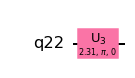

In [90]:
# Circuit

q_circuit = QuantumCircuit(q_reg)
q_circuit.u3(theta1,pi,0,q_reg)
q_circuit.draw('mpl')

In [91]:
# Unitary simulator

job = execute(q_circuit, backend)
job.result().get_unitary(q_circuit, decimals=3)

array([[ 0.406+0.j, -0.914+0.j],
       [-0.914+0.j, -0.406+0.j]])

In [92]:
# The operators agree
np.dot(-1,V)

array([[ 0.40561757, -0.91404288],
       [-0.91404288, -0.40561757]])

### U_inverse 

In [93]:
U_inverse

array([[ 0.13040053,  0.9914614 ],
       [-0.9914614 ,  0.13040053]])

$U=\begin{pmatrix} \cos(\frac{\theta}{2})&-e^{i\lambda}\sin(\frac{\theta}{2})\\
e^{i\phi}\sin(\frac{\theta}{2})&e^{i\lambda+i\phi}\cos(\frac{\theta}{2})\end{pmatrix}$

$\cos(\frac{\theta}{2})=0.13040053$

$\theta=2\cos^{-1}(0.13040053)$

### $\lambda$

$0.9914614 =-e^{i\lambda}\sin(\frac{\theta}{2})$

$=(-\cos \lambda -i\sin \lambda)\sin(\frac{\theta}{2})$

$-i\sin \lambda \sin(\frac{\theta}{2})=0$

$\sin \lambda=0$

$\lambda=\sin^{-1}0=0$

## $\phi$

$0.9914614 =e^{i\phi}\sin(\frac{\theta}{2})\\\\
=(\cos \phi +i\sin \phi)\sin(\frac{\theta}{2})$

$i\sin \phi \sin(\frac{\theta}{2})=0=\pi$

$\sin \phi=0$

$\phi=\sin^{-1}0=0=\pi$

In [94]:
# Theta

theta2= 2*math.acos(0.13040053)
theta2

2.880046756785191

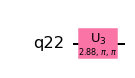

In [95]:
q_circuit = QuantumCircuit(q_reg)
q_circuit.u3(theta2,pi,pi,q_reg)
q_circuit.draw('mpl')

In [96]:
job = execute(q_circuit, backend)
job.result().get_unitary(q_circuit, decimals=3)

array([[ 0.13 +0.j,  0.991-0.j],
       [-0.991+0.j,  0.13 -0.j]])

In [97]:
# The operators agree

U_inverse

array([[ 0.13040053,  0.9914614 ],
       [-0.9914614 ,  0.13040053]])

### W unitary

In [98]:
W

[[0.021891749729905645, -0.9997603469300845],
 [0.9997603469300845, 0.021891749729905645]]

In [99]:
theta3= 2*math.acos(0.021891749729905645)
theta3

3.097805656177976

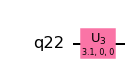

In [100]:
q_circuit = QuantumCircuit(q_reg)
q_circuit.u3(theta3,0,0,q_reg)
q_circuit.draw('mpl')

In [101]:
job = execute(q_circuit, backend)
job.result().get_unitary(q_circuit, decimals=3)

array([[ 0.022+0.j, -1.   +0.j],
       [ 1.   +0.j,  0.022+0.j]])

In [102]:
W

[[0.021891749729905645, -0.9997603469300845],
 [0.9997603469300845, 0.021891749729905645]]

In [103]:
U_inverse

array([[ 0.13040053,  0.9914614 ],
       [-0.9914614 ,  0.13040053]])

# Running circuit two on qasm simulator

In [104]:
from qiskit import BasicAer, execute
from qiskit.visualization import plot_histogram



In [105]:
backend_sim = BasicAer.get_backend('qasm_simulator')

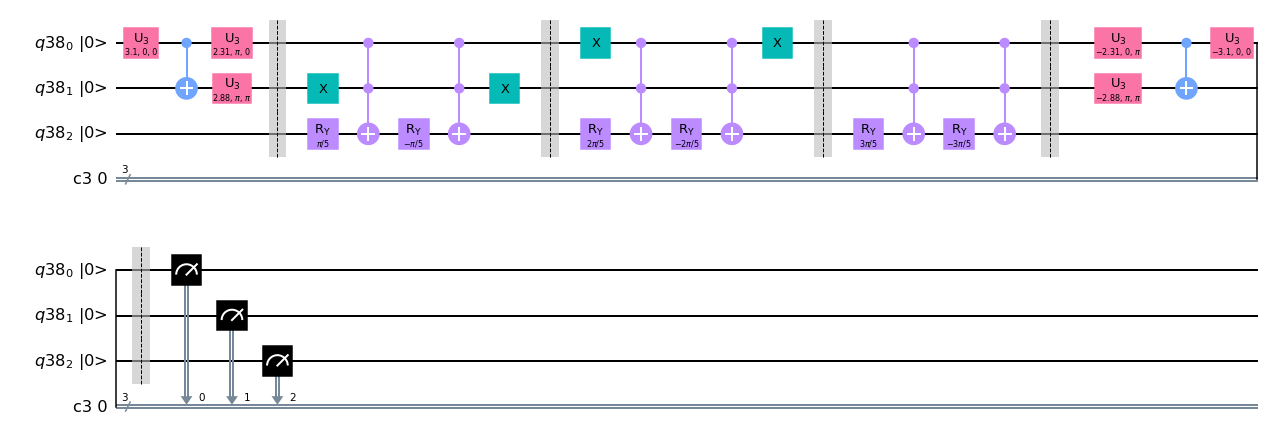

In [106]:
phi= np.arctan2(np.sqrt(c3),np.sqrt(c2))
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

#Angle for the Rotation gate
Beta= pi/5

# Operator V

qc.u3(theta3,0,0,q[0]) #W
qc.cx(q[0],q[1])
qc.u3(theta1,pi,0,q[0]) # V
qc.u3(theta2,pi,pi,q[1]) #U_inverse


# R
#First control is 1 and second control is 0
qc.barrier(q[0],q[1],q[2])
qc.x(q[1])
qc.ry(Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.ry(-Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.x(q[1])

qc.barrier(q[0],q[1],q[2])

#R2
#First control is 0 and second control is 1
#qc.barrier(q[0],q[1],q[2])
qc.x(q[0])
qc.ry(2*Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.ry(-2*Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.x(q[0])

#R3
# Both controls are 1
qc.barrier(q[0],q[1],q[2])

qc.ry(3*Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.ry(-3*Beta,q[2])
qc.ccx(q[0],q[1],q[2])




qc.barrier(q[0],q[1],q[2])

# Operator V^{-1}
qc.u3(-theta2,pi,pi,q[1]) #U_inverse
qc.u3(-theta1,0,pi,q[0])  #V
qc.cx(q[0],q[1])
qc.u3(-theta3,0,0,q[0]) #W

qc.barrier(q[0],q[1],q[2])

qc.measure(q,c)
qc.draw('mpl',initial_state=True)

In [107]:
 nshots=8192 #No. of simulations


#Quasm simulator
result = execute(qc, backend_sim, shots=nshots).result()
counts = result.get_counts(qc)


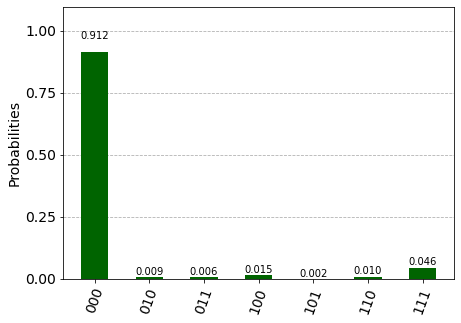

In [108]:
#Results obtained after simulations 
#in all states of the ancilla qubit.


plot_histogram(counts, color="darkgreen")

In [118]:
counts

{'000': 7507,
 '111': 371,
 '100': 100,
 '011': 46,
 '110': 95,
 '101': 13,
 '010': 60}

## Success probability

### Experimental value for the success probability:

In [110]:
count_000= counts.get('000')
count_100=counts.get('100')

In [112]:
# Conditional probabibilties in state |0>
p0 = count_000/nshots
p1 = count_100/nshots

# Success probability
S_p_exp = p0+p1
S_p_exp

0.92724609375

### Theoretical  success probability:

Theoretical value for the success probability:

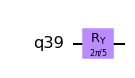

In [121]:
# Encoding matrix R, angle Beta=pi/5 was chosen

q_circuit = QuantumCircuit(q_reg)
q_circuit.ry(2*Beta,q_reg)
q_circuit.draw('mpl')

In [122]:
# The R matrix

job = execute(q_circuit, backend)
R=job.result().get_unitary(q_circuit)
R=R.real
R

array([[ 0.80901699, -0.58778525],
       [ 0.58778525,  0.80901699]])

\begin{align*}
&\sum_{k=0}^{1}|\big<k|\underline{\psi}\big>|^2=\frac{1}{(C_0+C_1+C_2+C_3)^2}\Big[|\big<0|(C_0I+C_1R+C_2R^2+C_3R^3)|y(0)\big>|^2+|\big<1|(C_0I+C_1R+C_2R^2+C_3R^3)|y(0)\big>|^2\Big]\\\\
\end{align*}	

$C_0I+C_1R+C_2R^2+C_3R^3$

In [123]:
D=(np.dot(c0,I)+np.dot(c1,R)+np.dot(c2,np.dot(R,R))+np.dot(c3,np.dot(np.dot(R,R),R)))
D

array([[ 1.16757172, -0.13784626],
       [ 0.13784626,  1.16757172]])

$(C_0I+C_1R+C_2R^2+C_3R^3)|y(0)\big>$

In [124]:
ket_0=[[1],[0]]

In [125]:
a=np.dot(D,ket_0)
a

array([[1.16757172],
       [0.13784626]])

In [126]:
ket_01=[1,0]

$\big<0|(C_0I+C_1R+C_2R^2+C_3R^3)|y(0)\big>$

In [127]:
b=np.dot(ket_01,a)

$|\big<0|(C_0I+C_1R+C_2R^2+C_3R^3)|y(0)\big>|^2$

In [128]:
b**2

array([1.36322371])

$|\big<1|(C_0I+C_1R+C_2R^2+C_3R^3)|y(0)\big>|^2$

In [129]:
ket_11=[0,1]

In [130]:
c=np.dot(ket_11,a)
c**2

array([0.01900159])

In [131]:
b**2+c**2

array([1.3822253])

###### Theoretical success probability

In [132]:
# Theoretical success probability

S_p=(b**2+c**2)/(c0+c1+c2+c3)**2
S_p[0]

0.9266386661904186

In [133]:
# Experimental Success probability

S_p_exp = p0+p1
S_p_exp

0.9285888671875

###### Theoretical and experimental success probabilities agree

### Solution to the differential equation

#### Theoretical solution to the differential equation

$C_0I+C_1R+C_2R^2+C_3R^3$

In [134]:
# Let D=c0I + C1R + C2R^2 + C3R^3

D=(np.dot(c0,I)+np.dot(c1,R)+np.dot(c2,np.dot(R,R))+np.dot(c3,np.dot(np.dot(R,R),R)))
D

array([[ 1.16757172, -0.13784626],
       [ 0.13784626,  1.16757172]])

$(C_0I+C_1R+C_2R^2+C_3R^3)|y(0)\big>$

In [135]:
# |0>

ket_0=[[1],[0]]

In [136]:
# y(t) = (c0I + C1R + C2R^2 + C3R^3) |0>

a=np.dot(D,ket_0)
a

array([[1.16757172],
       [0.13784626]])

In [137]:
y_0= 1.16757172
y_1= 0.13784626

In [138]:
# Theoretical solution of the ODE

Y = y_0/y_1
Y

8.470100821016109

## Experimental solution of the differential equation

In [139]:
# Experimental solution of the ODE

Y_exp = np.sqrt(p0/p1)
Y_exp

8.664294547163086

In [140]:
# Comparing with the theoretical

Y = y_0/y_1
Y

8.470100821016109

# Running circuit two on the Statevector Simulator

In [141]:
from qiskit.quantum_info import Statevector

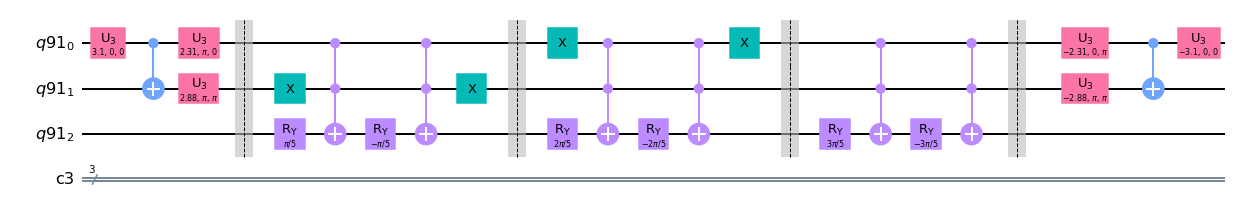

In [142]:

phi= np.arctan2(np.sqrt(c3),np.sqrt(c2))

# Registers and circuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

#Angle for the Rotation gate

Beta= pi/5


qc.u3(theta3,0,0,q[0]) #W
qc.cx(q[0],q[1])
qc.u3(theta1,pi,0,q[0]) # V
qc.u3(theta2,pi,pi,q[1]) #U_inverse

#First control is 1 and second control is 0
qc.barrier(q[0],q[1],q[2])
qc.x(q[1])
qc.ry(Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.ry(-Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.x(q[1])


#First control is 0 and second control is 1
qc.barrier(q[0],q[1],q[2])
qc.x(q[0])
qc.ry(2*Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.ry(-2*Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.x(q[0])


# Both controls are 1
qc.barrier(q[0],q[1],q[2])

qc.ry(3*Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.ry(-3*Beta,q[2])
qc.ccx(q[0],q[1],q[2])




qc.barrier(q[0],q[1],q[2])

qc.u3(-theta2,pi,pi,q[1]) #U_inverse
qc.u3(-theta1,0,pi,q[0])  #V
qc.cx(q[0],q[1])
qc.u3(-theta3,0,0,q[0]) #W

qc.draw('mpl')

Initial state:

In [143]:
sv = Statevector.from_label('000')

In [144]:
msv=sv.evolve(qc)

In [145]:
msv.data

array([ 0.95598121-2.67583018e-16j,  0.00461297+1.46370171e-17j,
        0.09187202-1.07034564e-17j,  0.07254507+5.37026529e-17j,
        0.11286538-5.52806428e-17j, -0.04635716+7.22282698e-18j,
       -0.10566253+4.13299450e-17j, -0.21522835+1.06280167e-16j])

In [146]:
result=msv.data.real

In [147]:
print(result)

[ 0.95598121  0.00461297  0.09187202  0.07254507  0.11286538 -0.04635716
 -0.10566253 -0.21522835]


Operator for projecting the ancilla qubit to the state |00>:

In [148]:
idmat=[[1,0],[0,1]]   #Indentity matrix
proj=[[1,0],[0,0]]    # projection operator
A=np.kron(idmat,proj) # Tensor product of I and proj
B=np.kron(A,proj)     # Another tensor product

In [149]:
proj_result=np.dot(B,result)  # Multiplying by the vector from the state vector simulation

In [150]:
print(proj_result)

[0.95598121 0.         0.         0.         0.11286538 0.
 0.         0.        ]


## Theoretical state vector

In [151]:
# |0>

ket_0=[[1],[0]]

In [152]:
# (c0I + C1R + C2R^2 + C3R^3) |0> matrix mulitplication

k=np.dot(D,ket_0)

In [153]:
# Tensor product of (c0I + C1R + C2R^2 + C3R^3) |0>  and |0> 

r=np.kron(k,ket_0)
r

array([[1.16757172],
       [0.        ],
       [0.13784626],
       [0.        ]])

In [154]:
# Tensor product of (c0I + C1R + C2R^2 + C3R^3) |0>  and |0>, and |0>

r1=np.kron(r,ket_0)
r1

array([[1.16757172],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.13784626],
       [0.        ],
       [0.        ],
       [0.        ]])

In [155]:
# Vector r1 divided by (c0_c1+c2+c3)

r1/(c0+c1+c2+c3)

array([[0.95598121],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.11286538],
       [0.        ],
       [0.        ],
       [0.        ]])

In [156]:
print(proj_result)

[0.95598121 0.         0.         0.         0.11286538 0.
 0.         0.        ]


# Circuit three

In [113]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np

In [114]:
from qiskit import BasicAer, execute
from qiskit.visualization import plot_histogram
 
backend_sim = BasicAer.get_backend('qasm_simulator')

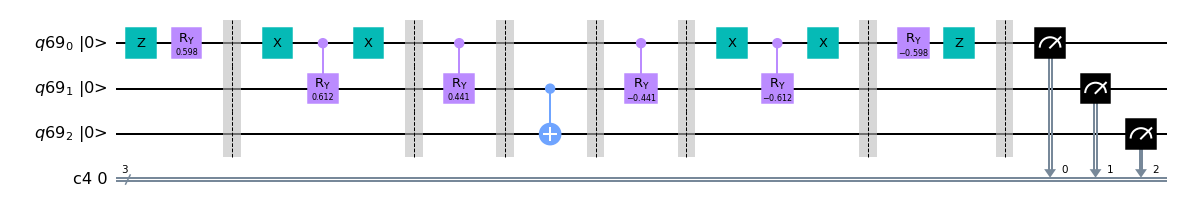

In [115]:
t=0.1  #time used to evaluate the ode

#Taylor series exapnsion
c0= np.cosh(t)
c1= np.sinh(t)
d0= np.sin(t)
d1= np.cosh(t)-1


#Normalisation
C= np.sqrt(c0+c1)
D= np.sqrt(d0+d1)
N= np.sqrt(C**2+D**2)



#Angles to rotate the qubits for superposition
psi= np.arctan2(D,C)
theta=np.arctan2(np.sqrt(c1),np.sqrt(c0))
phi=np.arctan2(np.sqrt(d1),np.sqrt(d0))



#Quantum registers and circuit
q= QuantumRegister(3)
c= ClassicalRegister(3)
qc = QuantumCircuit(q,c)

#Encoding gates

#V-gate
qc.z(q[0])
qc.ry(2*psi,q[0])
qc.barrier(q[0],q[1],q[2])

#Controlled ry with 0 control qubit
qc.x(q[0])
qc.cry(2*theta,q[0],q[1])
qc.x(q[0])
qc.barrier(q[0],q[1],q[2])

#Controlled ry with 1 control qubit
qc.cry(2*phi,q[0],q[1])
qc.barrier(q[0],q[1],q[2])

# cNOT-gate
qc.cx(q[1],q[2])
qc.barrier(q[0],q[1],q[2])

#Inverse Controlled ry with 1 control qubit
qc.cry(-2*phi,q[0],q[1])
qc.barrier(q[0],q[1],q[2])

#Inverse Controlled ry with 0 control qubit
qc.x(q[0])
qc.cry(-2*theta,q[0],q[1])
qc.x(q[0])
qc.barrier(q[0],q[1],q[2])

#Inverse V-gate
qc.ry(-2*psi,q[0])
qc.z(q[0])

qc.barrier(q[0],q[1],q[2])

#Measure
qc.measure(q,c)
qc.draw('mpl',initial_state=True)

## Running circuit three on a qasm simulator

In [116]:
 nshots=8192 #No. of simulations


#Quasm simulator
result = execute(qc, backend_sim, shots=nshots).result()
counts = result.get_counts(qc)


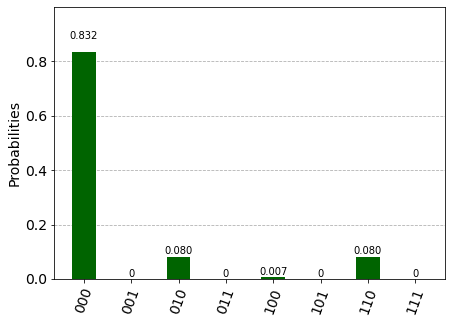

In [117]:
 #plot results
plot_histogram(counts, color="darkgreen")

In [118]:
counts

{'000': 6818,
 '110': 654,
 '010': 652,
 '100': 59,
 '111': 4,
 '101': 2,
 '011': 2,
 '001': 1}

## Success probability

### Experimental value for the success probability:

In [121]:
# Probabilities for which the ancillas are in |00> state 
p0 = counts.get('000')/nshots
p1 = counts.get('100')/nshots

# Success probability

S_p_exp = p0 + p1
S_p_exp

0.8394775390625

## Theoretical value of success probability

\begin{align}
 |\underline{\psi_5}\big>=\frac{1}{C^2+D^2}\Big[(C_0I+C_1X)|y(0)\big>+(D_0I+D_1X)|b\big>\Big],\label{psi51}
 \end{align}

\begin{align}
S_p=\sum_{k=0}^{1}\big|\big<k|\underline{\psi_5}\big>\big|^2
\end{align}




$S_p=\frac{1}{(D^2+C^2)^2}\big|\big<0|(C_0+XC_1)\big|0\big>+\big<1\big|C_0+XC_1|0\big>\big|^2+\frac{1}{(D^2+C^2)^2}\big|\big<0\big|(D_0+XD_1)\big|0\big>+\big<1\big|D_0+XD_1\big|0\big>\big|^2$

In [122]:
I= [[1,0],[0,1]]  # Identity
X= [[0,1],[1,0]]  # A=X
ket_0 = [1,0]     # <0|
ket_1 = [[1],[0]]  # |0>
ket_10 =[0,1]      # <1|

In [123]:
# C0I + C1X 

A=(np.dot(c0,I)+np.dot(c1,X))
A

array([[1.00500417, 0.10016675],
       [0.10016675, 1.00500417]])

In [124]:
# <0|(C0I+c1X)|0> + <1|(C0I+c1X)|0>

a=np.dot(np.dot(ket_0,A),ket_1) +  np.dot(np.dot(ket_10,A),ket_1)
a**2

array([1.22140276])

In [125]:


c=a**2*(1/((D**2+C**2)**2)
c

SyntaxError: invalid syntax (<ipython-input-125-ce83ca93b137>, line 4)

In [126]:
# D0I + D1X 

B=(np.dot(d0,I)+np.dot(X,d1))
B

array([[0.09983342, 0.00500417],
       [0.00500417, 0.09983342]])

In [127]:
# <0|(D0I+D1X)|0> + <1|(D0I+D1X)|0>

b=np.dot(np.dot(ket_0,B),ket_1) +  np.dot(np.dot(ket_10,B),ket_1)
b**2

array([0.01099092])

In [128]:
d=b**2*(1/((D**2+C**2)**2)
d

SyntaxError: invalid syntax (<ipython-input-128-7ac343472bc8>, line 2)

## Theoretical success probability

In [171]:
c+d

array([0.84172963])

In [120]:
# Comparing 
print(S_p_exp)
print(c+d[0])

0.8394775390625


NameError: name 'd' is not defined

###### Theoretical and experimental solution agree

## Solution to the differential equation

### Theoretical solution to the differential equation

${y(t)}=(c_0I+c_1X)|y(0)\big>+(d_0I+d_1X)|b\big>$

In [172]:
I= [[1,0],[0,1]] 
X= [[0,1],[1,0]]
y_0= [[1],[0]]
b=   [[1],[0]]

In [173]:
# y(t) = (C0 I + C1X)|y(0)> + (D0 I + D1X) |b>
np.dot((np.dot(c0,I)+np.dot(c1,X)),y_0) + np.dot((np.dot(d0,I)+np.dot(d1,X)),b)

array([[1.10483758],
       [0.10517092]])

In [174]:
y0=1.10516667
y1=0.10516667

In [175]:
Y = y0/y1
Y

10.508716021910743

## Experimental solution of the differential equation

In [176]:
np.sqrt(p0/p1)

10.072868835002478

#### Theoretical and experimental solution agree

## Running circuit three on the Statevector Simulator

In [177]:
from qiskit.quantum_info import Statevector

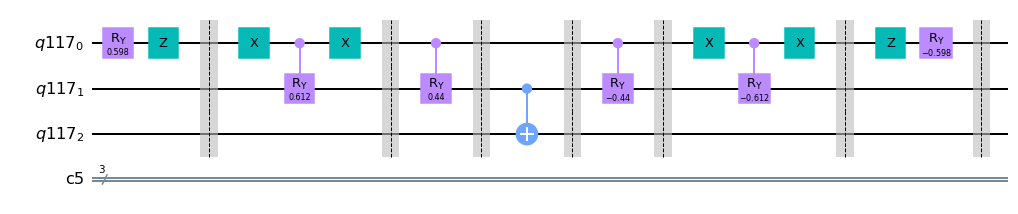

In [178]:
t=0.1  #time used to evaluate the ode

#Taylor series exapnsion
c0= 1+t**2/2
c1= t+t**3/6
d0= t+t**3/6
d1= t**2/2


#Normalisation
C= np.sqrt(c0+c1)
D= np.sqrt(d0+d1)
N= np.sqrt(C**2+D**2)


#Angles to rotate the qubits for superposition
psi= np.arctan2(D,C)
theta=np.arctan2(np.sqrt(c1),np.sqrt(c0))
phi=np.arctan2(np.sqrt(d1),np.sqrt(d0))


#Quantum registers and circuit
q= QuantumRegister(3)
c= ClassicalRegister(3)
qc = QuantumCircuit(q,c)

#Encoding gates

#V-gate
qc.ry(2*psi,q[0])
qc.z(q[0])
qc.barrier(q[0],q[1],q[2])

#Controlled ry with 0 control qubit
qc.x(q[0])
qc.cry(2*theta,q[0],q[1])
qc.x(q[0])
qc.barrier(q[0],q[1],q[2])

#Controlled ry with 1 control qubit
qc.cry(2*phi,q[0],q[1])
qc.barrier(q[0],q[1],q[2])

# cNOT-gate
qc.cx(q[1],q[2])
qc.barrier(q[0],q[1],q[2])

#Inverse Controlled ry with 1 control qubit
qc.cry(-2*phi,q[0],q[1])
qc.barrier(q[0],q[1],q[2])

#Inverse Controlled ry with 0 control qubit
qc.x(q[0])
qc.cry(-2*theta,q[0],q[1])
qc.x(q[0])
qc.barrier(q[0],q[1],q[2])

#Inverse V-gate
qc.z(q[0])
qc.ry(-2*psi,q[0])

qc.barrier(q[0],q[1],q[2])

#Measure
#qc.measure(q,c)
qc.draw('mpl')

### Experimental state vector

Initial state:

In [179]:
sv = Statevector.from_label('000')

In [180]:
msv=sv.evolve(qc)

In [181]:
msv.data

array([ 0.91310934+0.j,  0.01213774+0.j, -0.28063403+0.j,  0.02092583+0.j,
        0.08689066+0.j, -0.01213774+0.j,  0.28063403+0.j, -0.02092583+0.j])

In [182]:
result=msv.data.real

In [183]:
print(result)

[ 0.91310934  0.01213774 -0.28063403  0.02092583  0.08689066 -0.01213774
  0.28063403 -0.02092583]


Operator for projecting the ancilla qubit to the state |0>:

In [184]:
idmat=[[1,0],[0,1]] # Identity matrix
proj=[[1,0],[0,0]]  # projection operator
A1=np.kron(idmat,proj)  # Tensor product 
B1=np.kron(A1,proj)   # Tensor product

In [185]:
proj_result=np.dot(B1,result)

In [186]:
proj_result

array([0.91310934, 0.        , 0.        , 0.        , 0.08689066,
       0.        , 0.        , 0.        ])

In [187]:
print(proj_result)

[0.91310934 0.         0.         0.         0.08689066 0.
 0.         0.        ]


### Theoretical state vector

In [189]:
# F= (C0I + C1X )|0> \otimes |0> \otimes |0>
# S= (D0I + D1X )|0> \otimes |0> \otimes |0>

F=np.kron(np.kron(np.dot(A,ket_1),ket_1),ket_1)*(1/(D**2+C**2))
S=np.kron(np.kron(np.dot(B,ket_1),ket_1),ket_1)*(1/(D**2+C**2))

F+S

array([[0.91283744],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.08689418],
       [0.        ],
       [0.        ],
       [0.        ]])

Experimental and theoretical state vector agree